<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-61/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 4 - Actividad 1

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Nombre 2:** Ernesto Nicanor Santillán Guerrero 

**Matricula 2:** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** Jobish Vallikavungal Devassia

**Fecha:** 11 de Octubre de 2022

# PCA 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos.


## Paso 1: 

Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

Utilizar dataset descrito a continuación

Dataset information
Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [133]:
# Librería de manejo de bases
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=25
%matplotlib inline

# Librería de pre procesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Librería de PCA
from sklearn.decomposition import PCA

In [134]:
# Datos desde github
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
data = pd.read_csv(url)

In [135]:
# Creates a copy of the data
df=data.copy()

In [136]:
# Muestra algunas filas en aleatorio del dataframe (df)
df.sample(n=5, random_state=1)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
10747,10748,310000,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,172772.0,152397.0,110375.0,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12573,12574,10000,2.0,3.0,1.0,49.0,-1.0,-1.0,-2.0,-1.0,2.0,2.0,32.0,-358.0,-748.0,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29676,29677,50000,1.0,2.0,1.0,28.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,430.0,0.0,46257.0,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8856,8857,80000,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,3.0,2.0,36649.0,39448.0,40101.0,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21098,21099,270000,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,2.0,0.0,20979.0,17228.0,20924.0,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [137]:
# Revisa el número de columnas y filas
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")  # f-string

Hay 30000 filas y 25 columnas.


In [138]:
# Muestra la info básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

**Comentarios:**

-> El dataframe consta de 25 variables de las cuales una es la variable de respuesta, 23 son variables explicativa y una es el ID de cada cliente.

-> La variable ID no nos da ninguna información.

-> Hay algunas columnas con datos faltantes.

-> Todas las variables son numéricas.

-> Las variables X2 a X4, X6 a X11, e Y deberían ser categóricas.
 

## Análisis de PCA

PCA se usa principalmente con variables numericas. En este caso vamos a eliminar del dataframe las variables categoricas y la variable ID.

In [139]:
# Crea una lista de variables categóricas
cat=['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
id_=['ID']

In [140]:
# Deja unicamente las variables no categórias
df=df.loc[:, ~df.columns.isin(cat+id_)]

In [141]:
# Muestra las primeras 5 filas de la base
df.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [142]:
# Muestra la info básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X5      29995 non-null  float64
 2   X12     29989 non-null  float64
 3   X13     29989 non-null  float64
 4   X14     29987 non-null  float64
 5   X15     29985 non-null  float64
 6   X16     29983 non-null  float64
 7   X17     29990 non-null  float64
 8   X18     29992 non-null  float64
 9   X19     29991 non-null  float64
 10  X20     29992 non-null  float64
 11  X21     29989 non-null  float64
 12  X22     29989 non-null  float64
 13  X23     29995 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.2 MB


**Comentarios:**

-> Se elimino la columna ID.

-> Se eliminaron las variables categoricas

In [143]:
# Muestra un resumen estadístico de todas las variables
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X5,29995.0,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
X12,29989.0,51236.862750,73645.219278,-165580.0,3565.00,22387.0,67139.00,964511.0
X13,29989.0,49190.734669,71183.385123,-69777.0,2986.00,21207.0,64027.00,983931.0
X14,29987.0,47025.350152,69360.863317,-157264.0,2667.50,20089.0,60182.00,1664089.0
X15,29985.0,43275.652326,64345.500073,-170000.0,2329.00,19052.0,54560.00,891586.0
X16,29983.0,40324.493980,60809.984983,-81334.0,1763.50,18107.0,50213.00,927171.0
X17,29990.0,38881.135745,59561.312967,-339603.0,1256.25,17081.0,49208.25,961664.0
X18,29992.0,5662.945886,16564.165089,0.0,1000.00,2100.0,5006.00,873552.0
X19,29991.0,5922.488913,23044.177075,0.0,835.50,2009.0,5000.00,1684259.0


In [144]:
# Revisa si hay valores faltantes
df.isnull().sum()

X1      0
X5      5
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
dtype: int64

**Comentarios:**

-> Hay varias variables númericas con potenciales outliers ya que se observa una diferencia muy grande entre el min y el primer cuartil, y entre el máximo y el tercer cuartil.

-> Varias variables tienen valores faltantes


In [145]:
# Procedemos a imputar con la mediana estos valores faltantes
for n in df.columns:
  df[n].fillna(df[n].median(), inplace=True)

In [146]:
# Revisa si hay valores faltantes
df.isnull().sum()

X1     0
X5     0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

### Análisis Exploratorio de Datos

In [147]:
# función para crear un boxplot y un histograma en la misma escala.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    # For histogram

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    # Add median to the histogram

In [148]:
# función para crear barplot con etiquetas


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

** Graficar Variables numéricas**

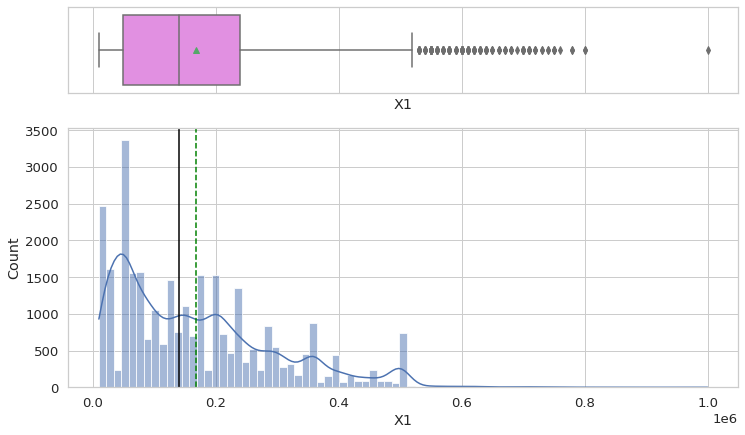

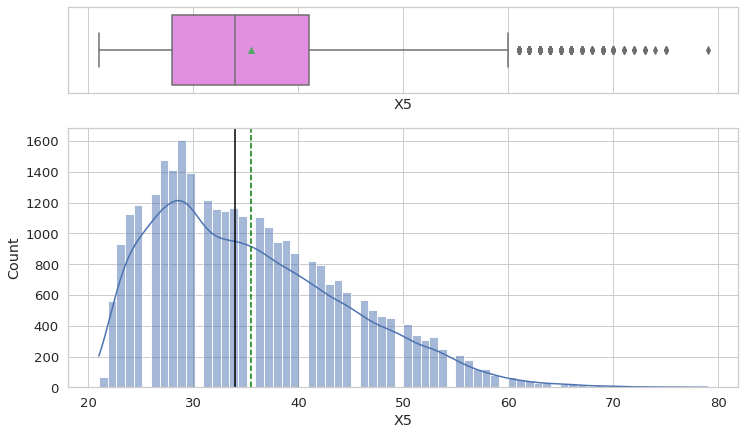

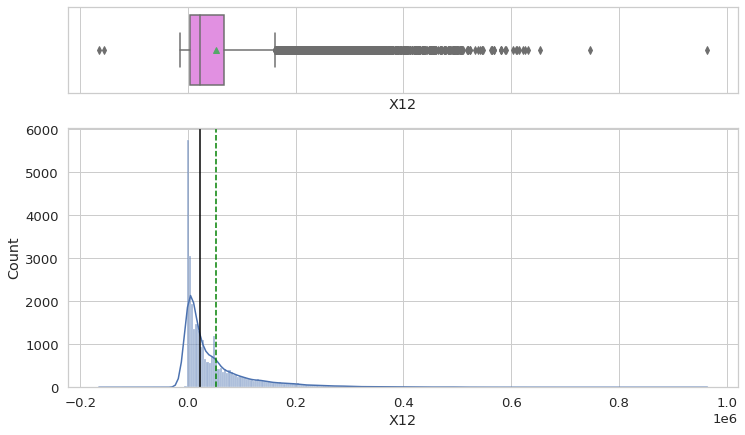

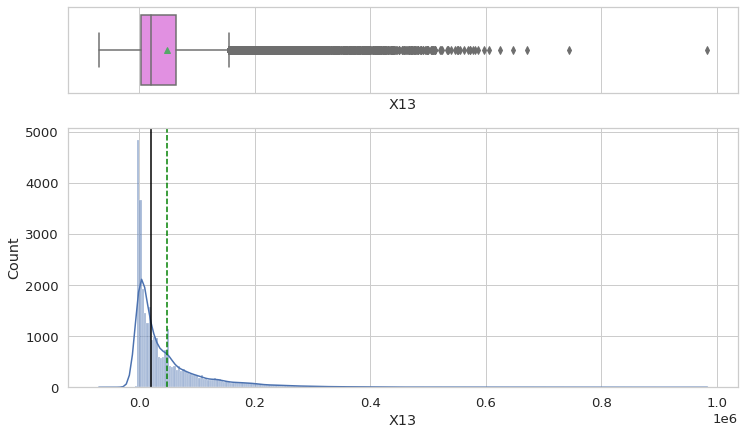

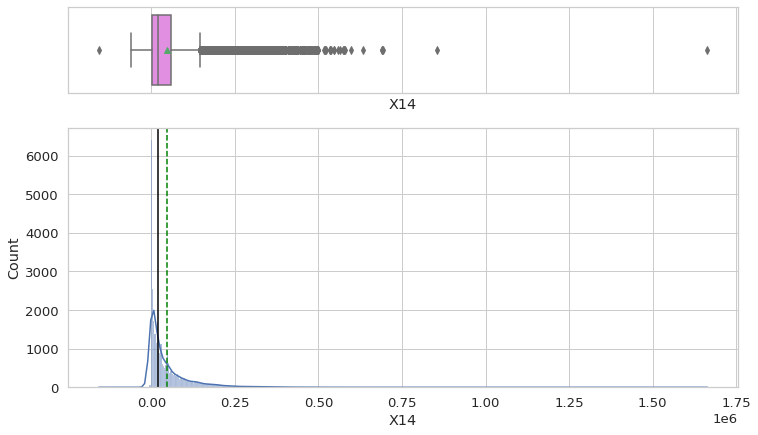

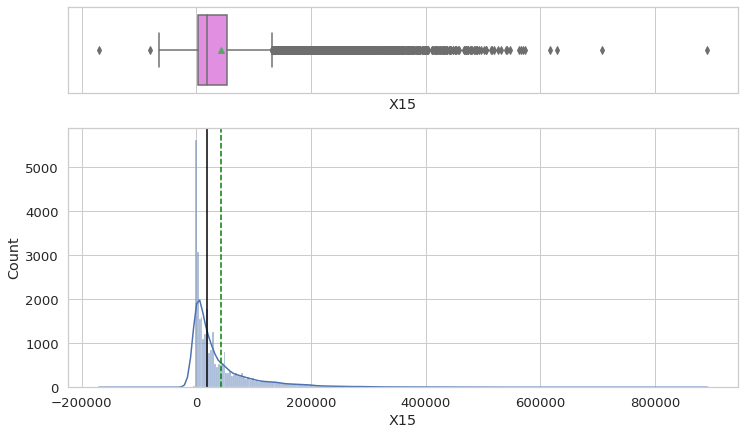

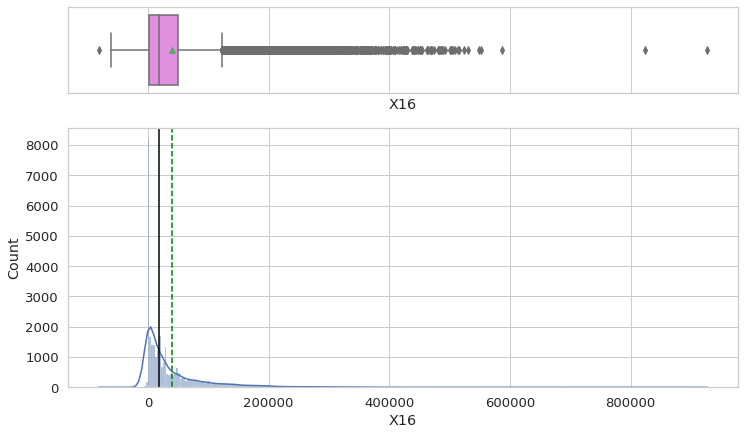

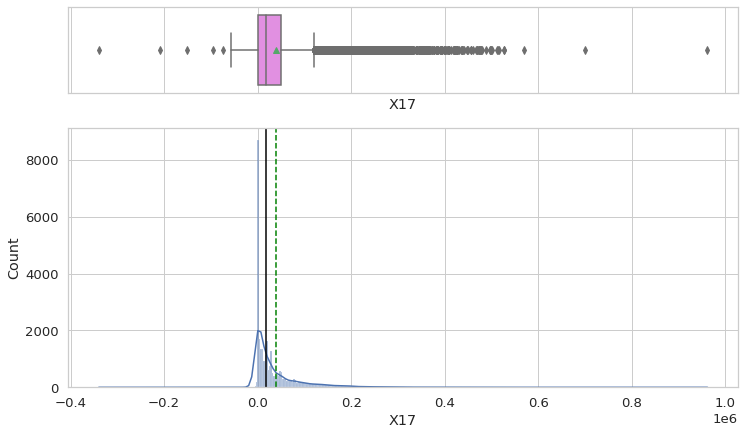

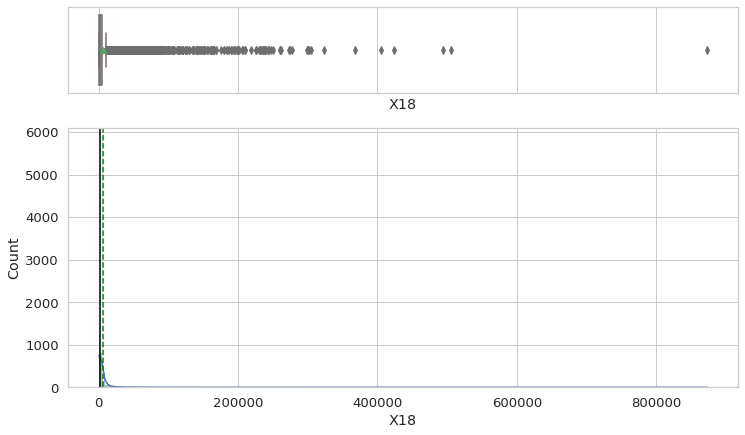

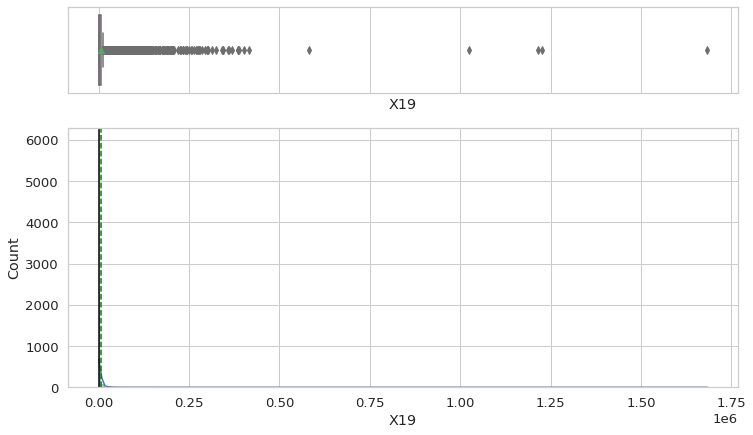

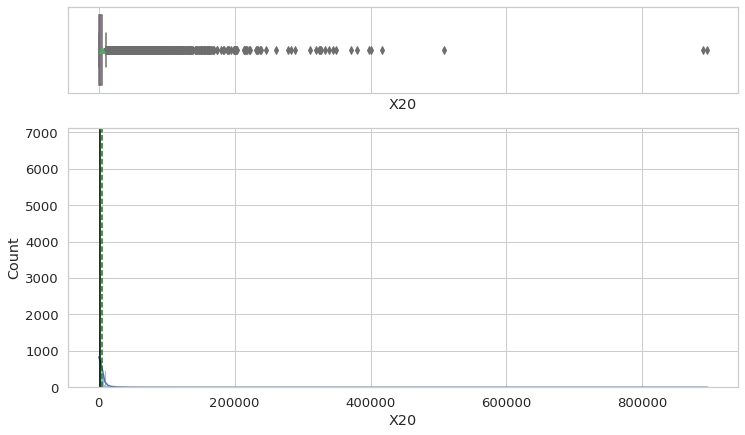

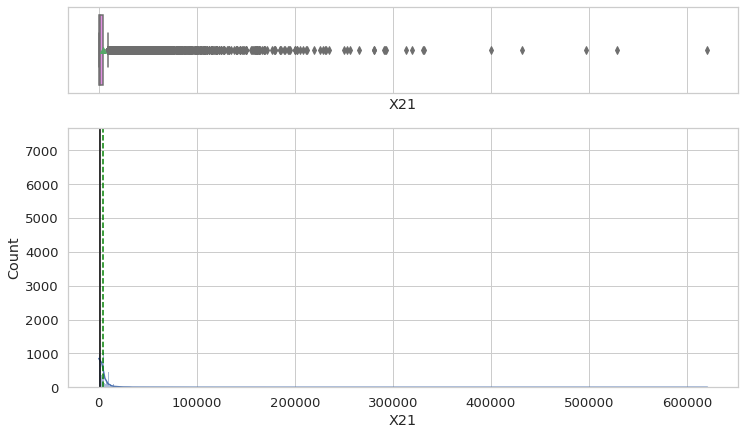

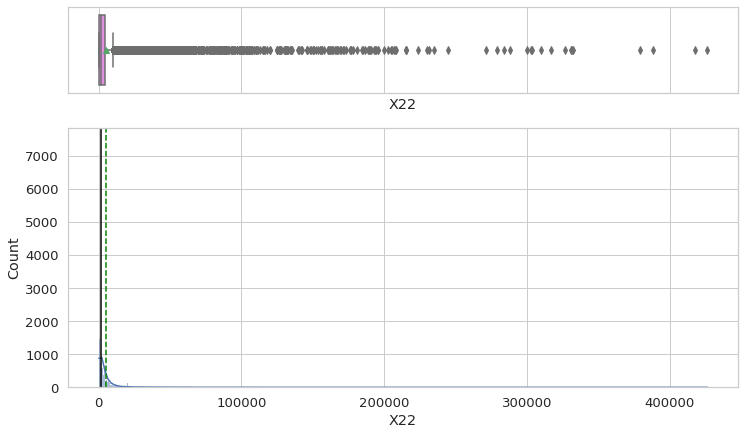

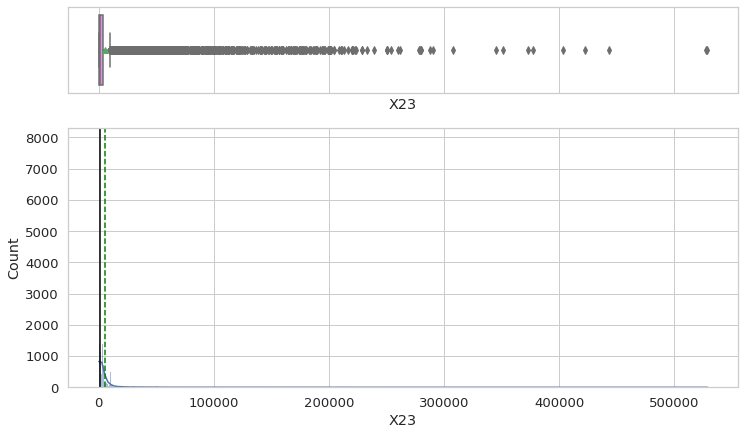

In [149]:
# Crea lista de las variables numericas
#num_col = df.columns[df.dtypes != "category"]

for n in df.columns:
  histogram_boxplot(data=df, feature=n, kde=True)

**Comentarios:**

-> Se observa que todas las variables tienen sesgo a la izquierda y la mayoría tienen muchos valores que potencialmente podrían ser outliers.

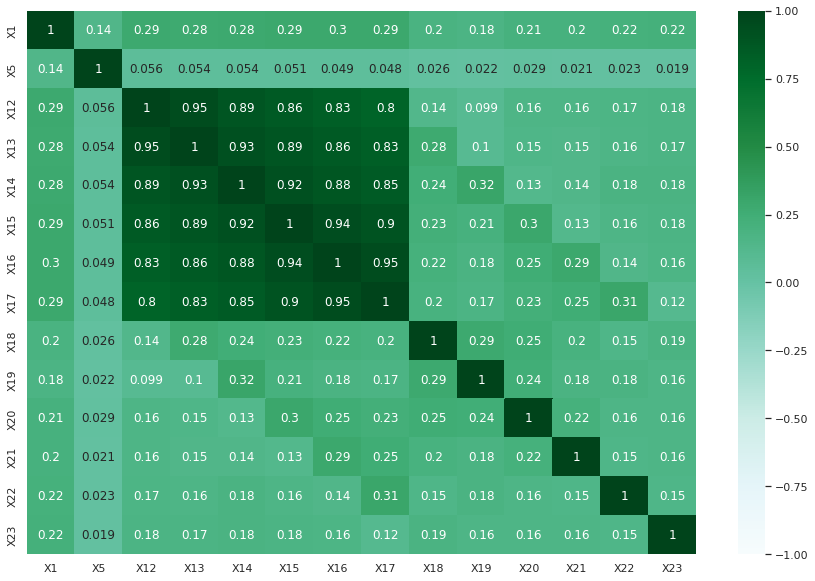

In [150]:
# Crea gráfico de correleción con codigo de colores
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

**Comentarios:**

-> Se observa correlacion entre varias variables. Principalmente entre las variables: X12 con X13 a X17, X13 con X14 a X17, X15 con X16 y X17, y, X16 con X17.

In [151]:
# Revisión de la varianza explicada por las variales para las variables X1, X5, X12
# Solo se va a revisar algunas para darse una idea.

cols=["X1","X5","X12"]

summary={"Varianza total":df[cols].var()[0:3],
         "Valor min":df[cols].min()[0:3],
         "Valor Max":df[cols].max()[0:3]}

pd.DataFrame(summary,index=cols).transpose()

,X1,X5,X12
Varianza total,1.683446e+10,84.958175,5.421935e+09
Valor min,1.000000e+04,21.000000,-1.655800e+05
Valor Max,1.000000e+06,79.000000,9.645110e+05


In [152]:
# Revisión de la varianza explicada por las variales para las variables X1, X5, X12
# Solo se va a revisar algunas para darse una idea.

t=df.var().sum()

var_X1=df.X1.var()
var_X5=df.X5.var()
var_X12=df.X12.var()

#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t\t:',t.round(2) )
print('Varianza X1 \t:', ((var_X1/t)*100).round(2),'%' )
print('Varianza X5 \t\t:', ((var_X5/t)*100).round(2),'%' )
print('Varianza X12 \t:', ((var_X12/t)*100).round(2),'%' )

Varianza Total 		: 45422224722.84
Varianza X1 	: 37.06 %
Varianza X5 		: 0.0 %
Varianza X12 	: 11.94 %


**Comentarios:**

  -> Notamos que X1 es responsable de casi un 40% de la variablidad total.
  
  -> Este resultado al igual que PCA se ve influenciado por la magnitud de las varialbes por lo que se normalizaran los datos más adelante.

**Procedemos a normalizar usando StandarScaler y generar copia de df normalizado**

In [153]:
# Normaliza los datos
scaler = StandardScaler()
scaled_std = scaler.fit_transform(df)
scaled_std[:5]

array([[-1.13672015, -1.24593841, -0.64255927, -0.64743179, -0.66801326,
        -0.67251865, -0.66308975, -0.65277489, -0.34187116, -0.2270927 ,
        -0.29675954, -0.30806271, -0.31411922, -0.29339039],
       [-0.3659805 , -1.02895094, -0.65927742, -0.66677952, -0.63927371,
        -0.6216564 , -0.60625852, -0.59801577, -0.34187116, -0.2135947 ,
        -0.2399603 , -0.24422917, -0.31411922, -0.18088632],
       [-0.59720239, -0.16100108, -0.29860817, -0.49392861, -0.48242469,
        -0.44974759, -0.41721038, -0.39167413, -0.25021436, -0.19189372,
        -0.2399603 , -0.24422917, -0.24866527, -0.01213022],
       [-0.90549825,  0.16448012, -0.05753276, -0.01331261,  0.03283955,
        -0.23238608, -0.18674371, -0.15661796, -0.22111121, -0.1693681 ,
        -0.22860046, -0.23784582, -0.24414894, -0.23713836],
       [-0.90549825,  2.33435477, -0.57867449, -0.61134976, -0.16119929,
        -0.34701268, -0.34815756, -0.33152474, -0.22111121,  1.33503053,
         0.27123284,  0.26

In [154]:
# Crea copia de la base con los datos normalizados
scaled_df_std = pd.DataFrame(scaled_std, columns=df.columns)
scaled_df_std.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,-1.245938,-0.642559,-0.647432,-0.668013,-0.672519,-0.663090,-0.652775,-0.341871,-0.227093,-0.296760,-0.308063,-0.314119,-0.293390
1,-0.365981,-1.028951,-0.659277,-0.666780,-0.639274,-0.621656,-0.606259,-0.598016,-0.341871,-0.213595,-0.239960,-0.244229,-0.314119,-0.180886
2,-0.597202,-0.161001,-0.298608,-0.493929,-0.482425,-0.449748,-0.417210,-0.391674,-0.250214,-0.191894,-0.239960,-0.244229,-0.248665,-0.012130
3,-0.905498,0.164480,-0.057533,-0.013313,0.032840,-0.232386,-0.186744,-0.156618,-0.221111,-0.169368,-0.228600,-0.237846,-0.244149,-0.237138
4,-0.905498,2.334355,-0.578674,-0.611350,-0.161199,-0.347013,-0.348158,-0.331525,-0.221111,1.335031,0.271233,0.266439,-0.269021,-0.255195


**Comentarios:**

  -> Se observa que todas las variables estan en la misma escala. Esto se realizó para que el PCA no sobreestime las variables con numeros más grandes.

**Revisión de la varianza explicada por las variales después de la normalización**

In [155]:
# Revisión de la varianza explicada por las variales para las variables X1, X5, X12
# Solo se va a revisar algunas para darse una idea.

cols=["X1","X5","X12"]

summary={"Varianza total":scaled_df_std[cols].var()[0:3],
         "Valor min":scaled_df_std[cols].min()[0:3],
         "Valor Max":scaled_df_std[cols].max()[0:3]}

pd.DataFrame(summary,index=cols).transpose()

,X1,X5,X12
Varianza total,1.000033,1.000033,1.000033
Valor min,-1.213794,-1.571420,-2.944435
Valor Max,6.416528,4.721217,12.403273


In [156]:
# Revisión de la varianza explicada por las variales para las variables X1, X5, X12
# Solo se va a revisar algunas para darse una idea.

t=scaled_df_std.var().sum()

var_X1=scaled_df_std.X1.var()
var_X5=scaled_df_std.X5.var()
var_X12=scaled_df_std.X12.var()

#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t\t:',t.round(2) )
print('Varianza X1 \t:', ((var_X1/t)*100).round(2),'%' )
print('Varianza X5 \t\t:', ((var_X5/t)*100).round(2),'%' )
print('Varianza X12 \t:', ((var_X12/t)*100).round(2),'%' )

Varianza Total 		: 14.0
Varianza X1 	: 7.14 %
Varianza X5 		: 7.14 %
Varianza X12 	: 7.14 %


**Comentarios:**

  -> Una vez normalizados los datos notamos que las 3 variables explican casi el mismo porcentaje de la variabilidad total.

### Aplicación de PCA

In [157]:
# Creación de los componentes principales
pca_std = PCA()
pca_std.fit_transform(scaled_df_std)

array([[-1.95855890e+00, -5.36490100e-01,  1.33009614e+00, ...,
        -3.21510387e-03,  8.12810521e-03,  9.86832627e-03],
       [-1.73537313e+00, -2.16924444e-01,  8.63723178e-01, ...,
         1.22190138e-02, -4.08900982e-03,  7.22018340e-04],
       [-1.22429620e+00, -2.84703830e-01,  2.13102074e-01, ...,
        -8.04889777e-02, -4.12371775e-02, -5.72265582e-02],
       ...,
       [-1.28489442e+00,  1.46863587e-01,  2.50542144e-01, ...,
         3.47386659e-02,  1.29955733e-02, -1.21186823e-02],
       [ 8.31877850e-01,  2.42169652e+00,  3.64722434e-01, ...,
         1.70868459e-01, -1.40378487e-01, -8.47087148e-03],
       [-5.16862809e-01, -6.00711078e-01, -7.49612781e-01, ...,
        -1.76377391e-02,  1.15558101e-01, -4.68530189e-02]])

In [158]:
# Resumen de varianza de los componentes principales

pcsSummary_df_std = pd.DataFrame({'Desviación estándar': np.sqrt(pca_std.explained_variance_),
                             '% de la varianza explicada': pca_std.explained_variance_ratio_*100,
                             '% Varianza acumulada': np.cumsum(pca_std.explained_variance_ratio_)*100
                             })

pcsSummary_df_std = pcsSummary_df_std.transpose()
pcsSummary_df_std.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df_std.columns) + 1)]
pcsSummary_df_std.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4330,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1592,0.1525
% de la varianza explicada,42.2799,12.2579,7.4652,6.6066,6.3115,6.2333,5.5681,5.1899,5.0514,1.8887,0.5072,0.2934,0.1811,0.1660
% Varianza acumulada,42.2799,54.5377,62.0029,68.6095,74.9210,81.1543,86.7223,91.9122,96.9635,98.8523,99.3595,99.6529,99.8340,100.0000


**Comentario:**

  -> Los primeros 8 componentes explican poco más del 90% de la variacion.

  -> Las variables que contribuyen más a los componentes PC1, PC2, PC3, PC4 y PC5 (solo capturando 75% variacion).

  -> Lo regular es querer explicar al menos el 80% de la variabilidad por lo que podrían elegirse usar los componentes 1 al 7.
  
  -> Si nos decidimos por los primeros 9 componenetes estariamos explicando casi el 97% de la variabilidad.

In [159]:
# Explicación de como se compone cada uno de los componentes principales
pcsComponents_df = pd.DataFrame(pca_std.components_.transpose(), 
                                columns=pcsSummary_df_std.columns,
                                index=scaled_df_std.iloc[:,0:].columns
                                )
pcsComponents_df.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.165480,0.300820,-0.378693,-0.200291,0.034732,-0.078238,0.110961,-0.048218
X5,0.032714,0.071917,-0.869618,0.338328,-0.038962,0.071319,-0.078628,0.028122
X12,0.372422,-0.190860,-0.034292,-0.063983,0.041153,-0.044065,0.008158,0.009440
X13,0.383241,-0.174661,-0.001872,0.007379,0.083062,-0.029004,-0.032345,-0.135667
X14,0.388252,-0.126928,0.034695,0.060466,0.114153,0.098805,-0.121318,0.092860
X15,0.391547,-0.120432,0.033998,0.074804,0.028585,0.014391,0.126416,0.039199
X16,0.388494,-0.105963,0.033826,0.039658,-0.106923,-0.099039,-0.007577,0.049710
X17,0.380658,-0.094250,0.018532,-0.070265,-0.164908,0.069734,0.007979,0.000053
X18,0.135184,0.383263,0.173454,0.361370,0.226152,0.039909,-0.201109,-0.749032
X19,0.116806,0.408284,0.200782,0.346352,0.150497,0.407283,-0.279626,0.577970


In [160]:
# Se muestran las variables principales que construyen los primeros 5 componentes principales
[(item,pcsComponents_df.sort_values(by=item, key=abs, ascending=False)[item][0:5]) for item in ['PC1','PC2','PC3','PC4','PC5']]

[('PC1', X15    0.391547
  X16    0.388494
  X14    0.388252
  X13    0.383241
  X17    0.380658
  Name: PC1, dtype: float64), ('PC2', X19    0.408284
  X20    0.392236
  X18    0.383263
  X21    0.349532
  X23    0.323466
  Name: PC2, dtype: float64), ('PC3', X5    -0.869618
  X1    -0.378693
  X19    0.200782
  X18    0.173454
  X20    0.122023
  Name: PC3, dtype: float64), ('PC4', X22   -0.609167
  X23   -0.367171
  X18    0.361370
  X19    0.346352
  X5     0.338328
  Name: PC4, dtype: float64), ('PC5', X23    0.657456
  X21   -0.579413
  X20   -0.239281
  X18    0.226152
  X22   -0.192848
  Name: PC5, dtype: float64)]

**Comentarios:**

-> Esta tabla es un resumen de la tabla anterior. En ella podemos observar las variables originales principales que componen los primeros 5 componentes.

-> Por ejemplo PC1 esta compuesto principalmente de la variables X16 (Monto de factura del credito en Mayo 2005), X14 (Monto de factura del credito en Julio 2005), X13 (Monto de factura del credito en Agosto 2005) y X17 (Monto de factura del credito en Abril 2005).

In [161]:
# Muestra la varianza explicada con cada componente
pcsSummary_df = pd.DataFrame({'% varianza explicada': np.round(pca_std.
                                explained_variance_ratio_,4) * 100,'% varianza acumulada': np.cumsum(pca_std.
                            explained_variance_ratio_) * 100})

pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.279866
1,12.26,54.537746
2,7.47,62.002923
3,6.61,68.609477
4,6.31,74.921010
5,6.23,81.154264
6,5.57,86.722320
7,5.19,91.912176
8,5.05,96.963545
9,1.89,98.852254


**Comentarios:**

-> PCA de componentes, de los cuales los top 8 explican el 91% de la variacion de los datos
-> Estos componentes podrían estar muy influenciados por los valores fuera de lo comun (outliers).

**Vamos a graficar el boxplot con los datos normalizados usando el standardscaler**


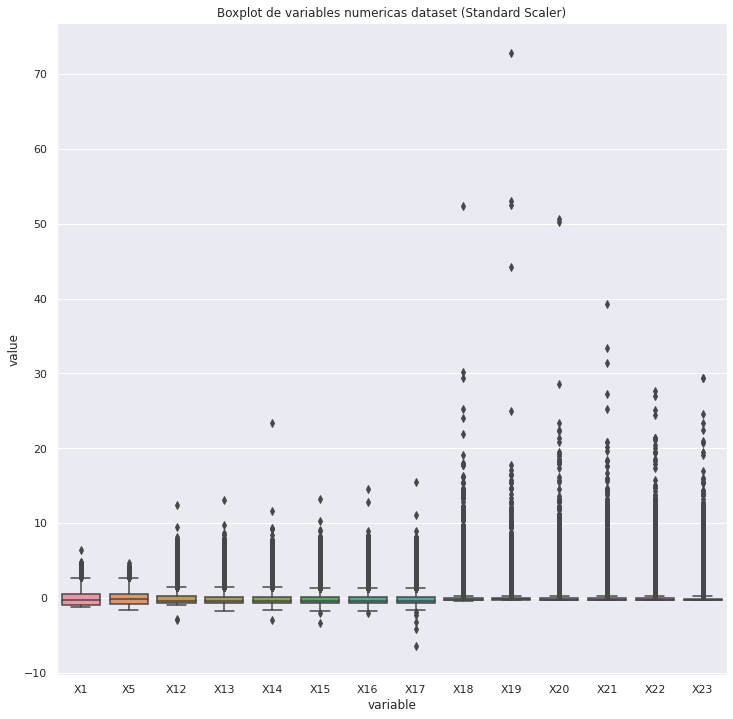

In [162]:
# Boxplot de los datos normalizados
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot(x='variable', y='value', data=pd.melt(scaled_df_std));
plt.title("Boxplot de variables numericas dataset (Standard Scaler)");

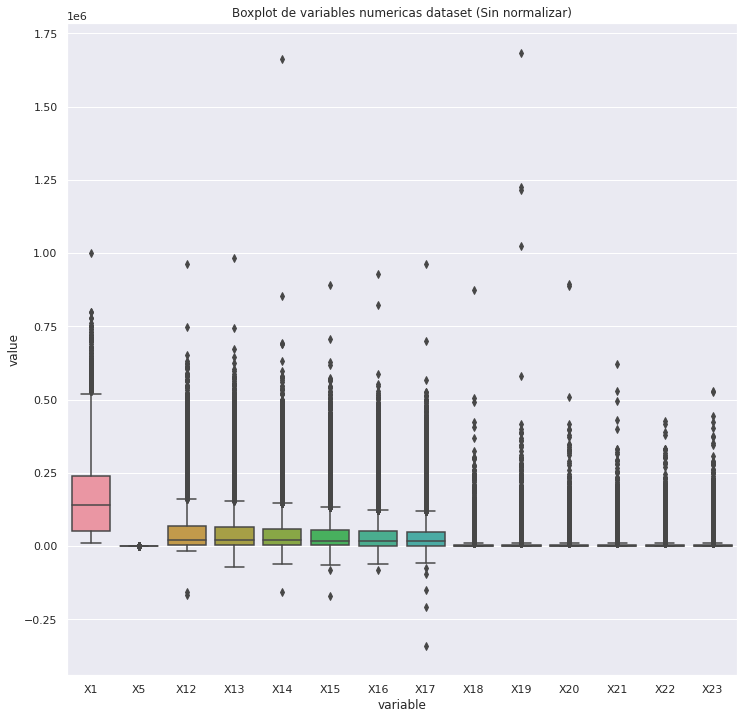

In [163]:
# Boxplot de los datos originales
sns.boxplot(x='variable', y='value', data=pd.melt(df));
plt.title("Boxplot de variables numericas dataset (Sin normalizar)");

**Comentarios:**

  -> Se sigue observando los mismos outliers al normalizar con el Standard Scaler.

**Procedemos a normalizar usando MinMax y generar copia de df normalizado con la intención de ver si cambia los componentes generados durante el PCA**

In [164]:
# Normalización de los datos utilizando la normalización mix-max
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(df)
scaled_minmax[:2]

array([[0.01010101, 0.05172414, 0.14998173, 0.06916432, 0.08672289,
        0.16013776, 0.08064809, 0.26097872, 0.        , 0.00040908,
        0.        , 0.        , 0.        , 0.        ],
       [0.11111111, 0.0862069 , 0.14889243, 0.06785751, 0.08781713,
        0.16321994, 0.08407395, 0.26348474, 0.        , 0.00059373,
        0.00111602, 0.00161031, 0.        , 0.00378311]])

In [165]:
# Copia de bd con los datos normalizados con min-max
scaled_df_minmax = pd.DataFrame(scaled_minmax, columns=df.columns)

Text(0.5, 1.0, 'Boxplot de variables numericas dataset (Normalizacion MinMax )')

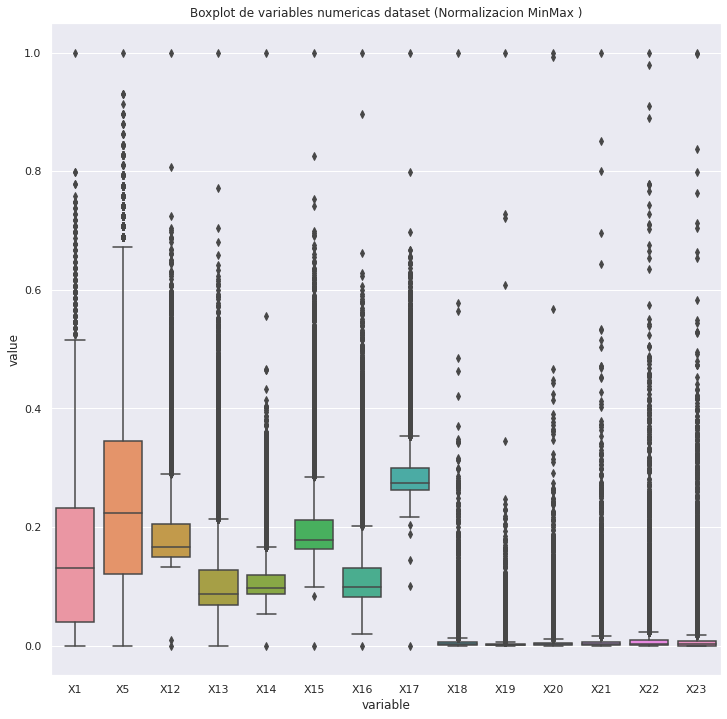

In [166]:
# Boxplot de datos normalizados con min-max
sns.set(rc={'figure.figsize':(12,12)})
sns.boxplot(x='variable', y='value', data=pd.melt(scaled_df_minmax))
plt.title("Boxplot de variables numericas dataset (Normalizacion MinMax )")

**Comentarios:**

  -> Se observa una reducción de los valores outliers.

**PCA (datos con minmax scaler)**

In [167]:
# Creación de componentes PCA con datos min-max
pca_minmax = PCA()
pca_minmax.fit_transform(scaled_df_minmax)

array([[-2.62106016e-01, -2.71309899e-02,  2.81243812e-02, ...,
         3.96234115e-04,  3.45169428e-04,  6.17014902e-04],
       [-1.88345137e-01,  6.45803056e-03, -4.12649023e-02, ...,
         7.40883083e-04, -2.79490567e-04, -9.06301604e-05],
       [-7.67098382e-02, -6.46185185e-02,  1.66235993e-02, ...,
        -5.17039340e-03, -1.22217481e-03, -4.17959106e-04],
       ...,
       [-6.39615136e-02, -1.30048887e-01,  5.98110681e-02, ...,
         4.13109961e-03,  9.03072940e-04, -1.46978725e-03],
       [ 4.14173466e-02, -9.53482246e-02,  6.87747710e-02, ...,
        -1.28232753e-02, -7.89310240e-03, -9.93359044e-03],
       [ 9.21884933e-02, -1.69902475e-01,  1.00099798e-01, ...,
        -9.41236013e-05,  7.38905947e-03, -1.93918862e-03]])

In [168]:
# Resumen de varianza de los componentes principales
pcsSummary_df_minmax = pd.DataFrame({'Desviación': np.sqrt(pca_minmax.explained_variance_),
                             '% de la varianza explicada': pca_minmax.explained_variance_ratio_*100,
                             '% Varianza acumulada': np.cumsum(pca_minmax.explained_variance_ratio_*100)
                             })

pcsSummary_df_minmax = pcsSummary_df_minmax.transpose()
pcsSummary_df_minmax.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df_minmax.columns) + 1)]
pcsSummary_df_minmax.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación,0.1654,0.1453,0.1099,0.0368,0.0337,0.0319,0.0248,0.0210,0.0188,0.0156,0.0120,0.0104,0.0086,0.0062
% de la varianza explicada,41.4252,31.9465,18.2653,2.0481,1.7199,1.5434,0.9307,0.6669,0.5325,0.3688,0.2178,0.1648,0.1125,0.0576
% Varianza acumulada,41.4252,73.3717,91.6370,93.6852,95.4051,96.9485,97.8792,98.5461,99.0785,99.4473,99.6651,99.8299,99.9424,100.0000


**Comentarios:**

  -> Con los datos min-max se captura más varianza en menos componentes.

  -> Los primeros 3 componentes explican mas del 90% de la variación. 

  -> Bajo nuestro criterio es adecuado quedarse con 3 componentes.

In [169]:
# Composición de los componentes principales
pcsminmaxComponents_df = pd.DataFrame(pca_minmax.components_.transpose(), 
                                columns=pcsSummary_df_minmax.columns,
                                index=scaled_df_minmax.iloc[:,0:].columns
                                )
pcsminmaxComponents_df.iloc[:,:3]

,PC1,PC2,PC3
X1,0.437234,0.500816,-0.741745
X5,0.824708,-0.554503,0.111099
X12,0.164544,0.302391,0.306196
X13,0.171193,0.318066,0.330680
X14,0.096055,0.178208,0.181198
X15,0.154545,0.288691,0.286747
X16,0.152013,0.284822,0.278143
X17,0.112540,0.210894,0.203392
X18,0.018288,0.028957,0.002488
X19,0.010888,0.016698,-0.002875


In [170]:
# Principales variables que componen los primeros 3 componentes principales
[(item,pcsminmaxComponents_df.sort_values(by=item, key=abs, ascending=False)[item][0:5]) for item in ['PC1','PC2','PC3']]

[('PC1', X5     0.824708
  X1     0.437234
  X13    0.171193
  X12    0.164544
  X15    0.154545
  Name: PC1, dtype: float64), ('PC2', X5    -0.554503
  X1     0.500816
  X13    0.318066
  X12    0.302391
  X15    0.288691
  Name: PC2, dtype: float64), ('PC3', X1    -0.741745
  X13    0.330680
  X12    0.306196
  X15    0.286747
  X16    0.278143
  Name: PC3, dtype: float64)]

**Comentarios:**

-> Como se menciono en la sección anterior, esta tabla es un resumen de la tabla anterior. En ella podemos observar las variables originales principales que componen los primeros 3 componentes.

-> Por ejemplo, PC1 y PC2 estan compuestos principalmente de la variables X1, X13, X12 y X15. Y, PC3 está compouesto principalmente por X13, X12, X15 y X16. Esto nos dice que las variables que más influencian la variabilidad (y por tanto los componente principales) son edad, monto de credito y monto a pagar en los primero dos meses.

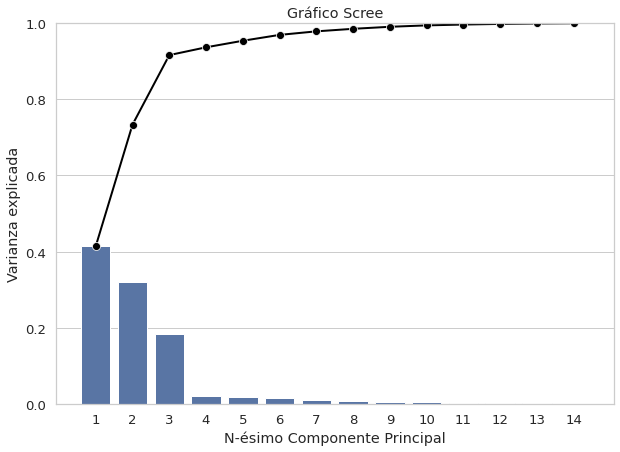

In [171]:
PC_components = np.arange(pca_minmax.n_components_) + 1
#PC_components

# Gráfico Scree
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca_minmax.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca_minmax.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Gráfico Scree')
plt.xlabel('N-ésimo Componente Principal')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

**Cometarios:**

  -> En la gráfica Scree notamos claramente el "codo" en el componente 3, lo cual concuerda con el número de componente que habíamos seleccionado.

**Cometarios finales:**

  ->Usar minmaxscaler mejora la captura de mayor variacion en menos componentes.

  ->Tambien las variables que contribuyen a estos componentes son mas congruentes tal como edad, monto credito y monto a pagar en los primeros 2 meses.

## Paso 2: 

Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

1. ¿Cuál es el número de componentes mínimo y por qué?
2. ¿Cuál es la variación de los datos que representan esos componentes?
3. ¿Cuál es la pérdida de información después de realizar PCA?
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 
Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.

**1. ¿Cuál es el número de componentes mínimo y por qué?**
<br><br>
Por lo general se considera como mínimo que se los componentes principales elegidos deben explicar el 80% de la variabilidad de los datos. En el caso del PCA de los valores normalizados con min-max, como mínimo deberíamos quedarnos con los tres primeros componentes ya que si se elige uno menos solo se explicaría poco más del 70% de la variabilidad. 

**2. ¿Cuál es la variación de los datos que representan esos componentes?**
<br><br>
La variación de los datos que representan los primeros tres componentes, PC1, PC2 y PC3 es del 91.64%.

**3. ¿Cuál es la pérdida de información después de realizar PCA?**
<br><br>
La perdida de información sería del 8.36%. Es una pérdida de información pequeña considerando que se pasó de tener catorce variables a tener 3 variables. Sin embargo, igualmente debe considerarse una pérdida en la interpretabilidad de los resultados. Ya que a pesar de que es posible saber qué variables originales componen los PCA al momento de realizar un modelo la interpretación del mismo no es tan clara.

**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**
<br><br>
Mayor impacto: Edad (X5), Cantidad de crédito (X1) y monto facturado de los últimos 2 meses (X12 y X13).
Menor impacto: Cantidad que pagaste en los últimos 3 meses es decir variables X19, X20 y X18 

En resumen, importa más lo que se debe y la edad del cliente. Importa menos lo que pagaste recientemente.
Puede explicarse que con la edad se adquiere mayor madurez a la hora de cumplir los compromisos financieros. 
No están importante cuanto pagaste los últimos meses, si el saldo facturado sigue siendo significativo.

**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
<br><br>
PCA es un método que se utiliza cuando el conjunto de datos a analizar cuenta con muchas características (es decir tiene muchas dimensiones) y queremos reducirlas a un número menor sin perder la información que contienes, es decir preservando la varianza. Logra esto filtrando información redundante en el conjunto de datos. Por ejemplo, datos altamente correla-cionados entre sí. Los beneficios principales que ofrece para el machine learning es que permite trabajar con conjuntos de datos menos complejos, reduce el uso de memoria y costos computacionales como se refiere en (Avinash Navlani et al., 2021). PCA es en esencia un método no supervisado de machine learning que se puede usar como tal y/o como soporte en el desarrollo de modelos supervisados. Es decir, se puede usar como parte de la etapa de preprocesamiento para disminuir las variables a explorar en un algoritmo de clasificación/regresión.
 
Adicionalmente, se utiliza el analisis de componentes principales (PCA) cuando se tiene multicolinearidad (correlación entre las variables explicativas) entre las variables. Esto es posible ya que PCA, lo que hace es utilizar la correlación entre las varaibles para encontrar un set de variables nuevas que no estan relacionadas y por tanto elimina la multicolinearidad.
<br><br>
*Bibliografía*<br><br>
Avinash Navlani, Fandango, A., & Idris, I. (2021). Python data analysis: perform data collection, data processing, wrangling visualization, and model building using Python. Packt Publishing.
<br><br>
Pramoditha, R. (2022, 6 enero). How do you apply PCA to Logistic Regression to remove Multicollinearity? Medium.
Recuperado 11 de octubre de 2022, de https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20(Principal%20Component%20Analysis)%20takes,effectively%20eliminate%20multicollinearity%20between%20features.